In [4]:
!pip3 install xgboost
import pandas as pd
import matplotlib.pylab as plt 
import seaborn as sns
import numpy as np 
df = pd.read_csv('stroke-data.csv', skiprows = [0], names = ['id',
     'Gender', 'Age', 'Hypertension', 'Heart_Disease', 'Ever_Married', 'Work_Type', 'Residence_Type', 'Avg_Glucose_Level', 'BMI','Smoking_Status', 
     'Stroke'], index_col = ['id'])
df.head()

,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Level,BMI,Smoking_Status,Stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [42]:
df.shape

(5110, 11)

In [43]:
df.isna().sum()

Gender                 0
Age                    0
Hypertension           0
Heart_Disease          0
Ever_Married           0
Work_Type              0
Residence_Type         0
Avg_Glucose_Level      0
BMI                  201
Smoking_Status         0
Stroke                 0
dtype: int64

In [44]:
print(df[df['Work_Type']=='Private']['BMI'].mean())
print(df[df['Work_Type']=='Self-employed']['BMI'].mean())
print(df[df['Work_Type']=='Govt_job']['BMI'].mean())
print(df[df['Work_Type']=='children']['BMI'].mean())
print(df[df['Work_Type']=='Never_worked']['BMI'].mean())

30.30462468872287
30.211870967741937
30.522063492063495
20.038002980625933
25.545454545454547


In [45]:
def impute_bmi(cols):
    bmi = cols[0]
    Work_Type = cols[1]
    
    if pd.isnull(bmi):
        if Work_Type == 'Private':
            return 30.30
        elif Work_Type == 'Self-employed':
            return 30.21
        elif Work_Type == 'Govt_job':
            return 30.52
        elif Work_Type == 'children':
            return 20.03
        else:
            return 25.54
    else:
        return bmi 

In [46]:
df['BMI'] = df[['BMI','Work_Type']].apply(impute_bmi,axis=1)

In [47]:
df.isna().sum()

Gender               0
Age                  0
Hypertension         0
Heart_Disease        0
Ever_Married         0
Work_Type            0
Residence_Type       0
Avg_Glucose_Level    0
BMI                  0
Smoking_Status       0
Stroke               0
dtype: int64

In [48]:
df.duplicated().sum()

0

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             5110 non-null   object 
 1   Age                5110 non-null   float64
 2   Hypertension       5110 non-null   int64  
 3   Heart_Disease      5110 non-null   int64  
 4   Ever_Married       5110 non-null   object 
 5   Work_Type          5110 non-null   object 
 6   Residence_Type     5110 non-null   object 
 7   Avg_Glucose_Level  5110 non-null   float64
 8   BMI                5110 non-null   float64
 9   Smoking_Status     5110 non-null   object 
 10  Stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


In [50]:
df.describe()

,Age,Hypertension,Heart_Disease,Avg_Glucose_Level,BMI,Stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.916802,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.718680,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


C:\Users\ownag\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Age of Participants')

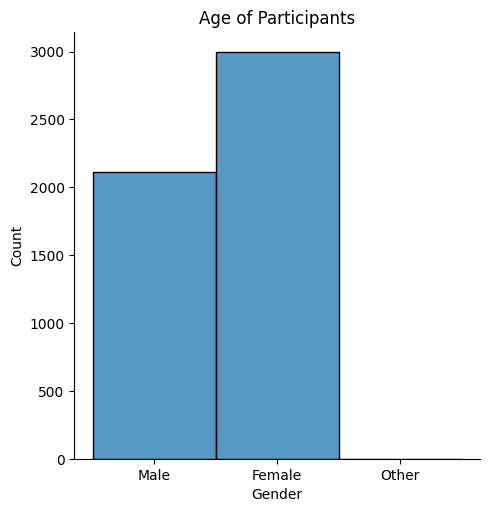

In [10]:
sns.displot(df["Gender"], kde=False)
plt.title("Age of Participants")

Text(0.5, 1.0, 'Age of Participants')

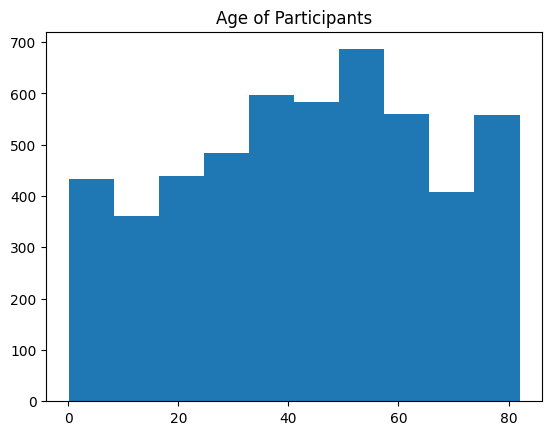

In [9]:
plt.hist(df["Age"])
plt.title("Age of Participants")

In [13]:
def age_groups(x):
    if x >= 0.0 and x < 10.0:
        return "age 0-9"
    elif x >= 10.0 and x < 20.0:
        return "age 10-19"
    elif x >= 20.0 and x < 40.0:
        return "age 20-39"
    elif x >= 40.0 and x < 60.0:
        return "age 40-59"
    else:
        return "age 60-80"

In [14]:
df["Age_group"] = df["Age"].apply(lambda x:age_groups(x))

Text(0.5, 1.0, 'Age range of Participants')

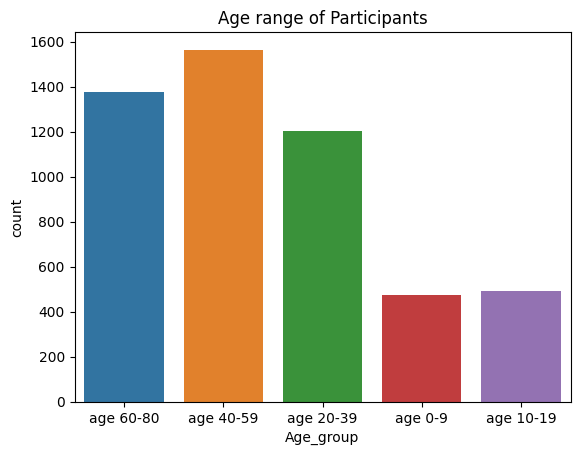

In [15]:
sns.countplot(x="Age_group", data=df)
plt.title("Age range of Participants")

([<matplotlib.axis.XTick at 0x1ba849c5950>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

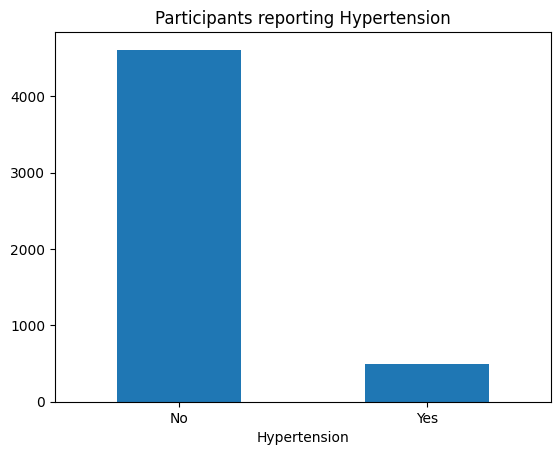

In [35]:
df["Hypertension"].value_counts().plot.bar()
plt.title("Participants reporting Hypertension")
labels = ['No', 'Yes']
xi = list(range(len(labels)))
plt.xticks(xi, labels, rotation = 0)

([<matplotlib.axis.XTick at 0x1ba84eeff90>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

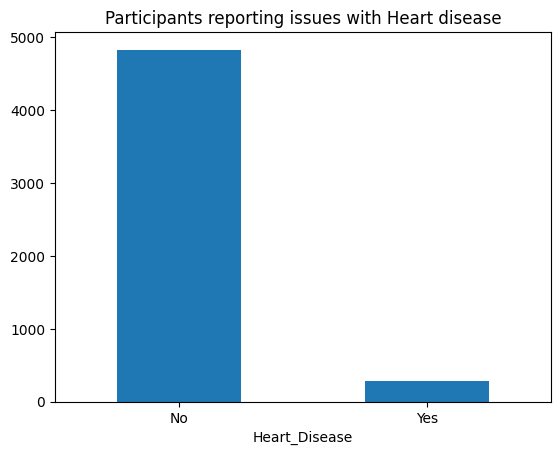

In [36]:
df["Heart_Disease"].value_counts().plot.bar()
plt.title("Participants reporting issues with Heart disease")
labels = ['No', 'Yes']
xi = list(range(len(labels)))
plt.xticks(xi, labels, rotation = 0)

([<matplotlib.axis.XTick at 0x1ba84f384d0>,
 [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

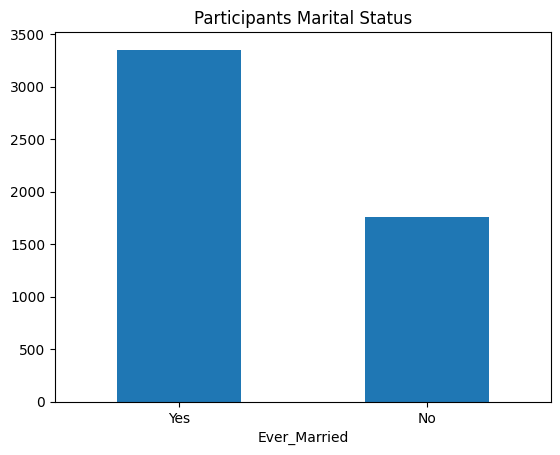

In [37]:
df["Ever_Married"].value_counts().plot.bar()
plt.title("Participants Marital Status")
labels = ['Yes','No']
xi = list(range(len(labels)))
plt.xticks(xi, labels, rotation = 0)

Text(0.5, 1.0, 'Participants Work Sector')

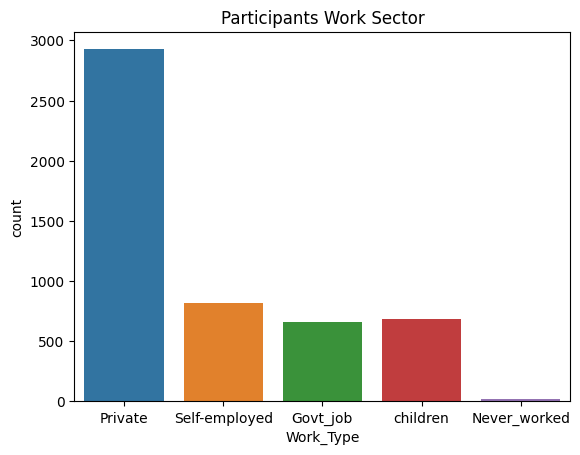

In [40]:
sns.countplot(x="Work_Type", data=df)
plt.title("Participants Work Sector")

Text(0.5, 1.0, 'Participant Smoking Status')

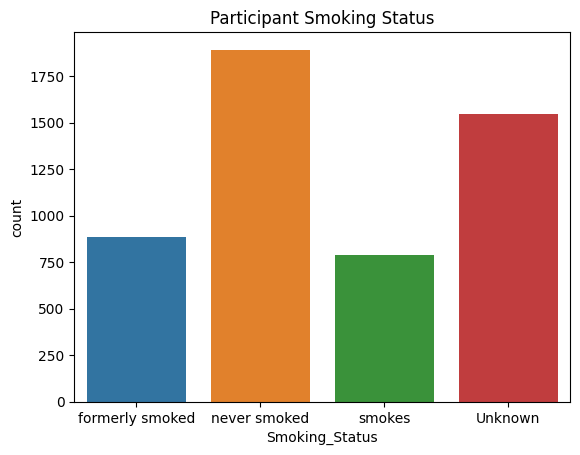

In [41]:
sns.countplot(x="Smoking_Status", data=df)
plt.title("Participant Smoking Status")

Text(0.5, 1.0, 'Average glucose level of participants')

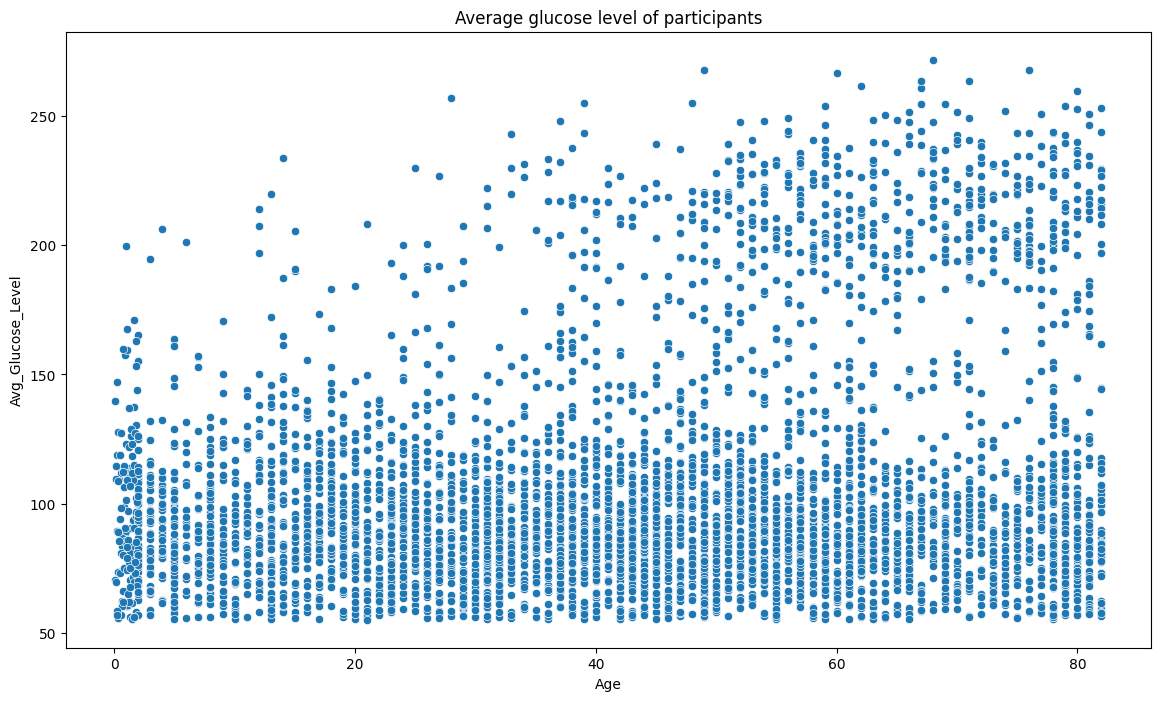

In [42]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data = df , x = 'Age' , y ='Avg_Glucose_Level')
plt.title("Average glucose level of participants")

Text(0.5, 1.0, 'Comparison between the Age and BMI of participants')

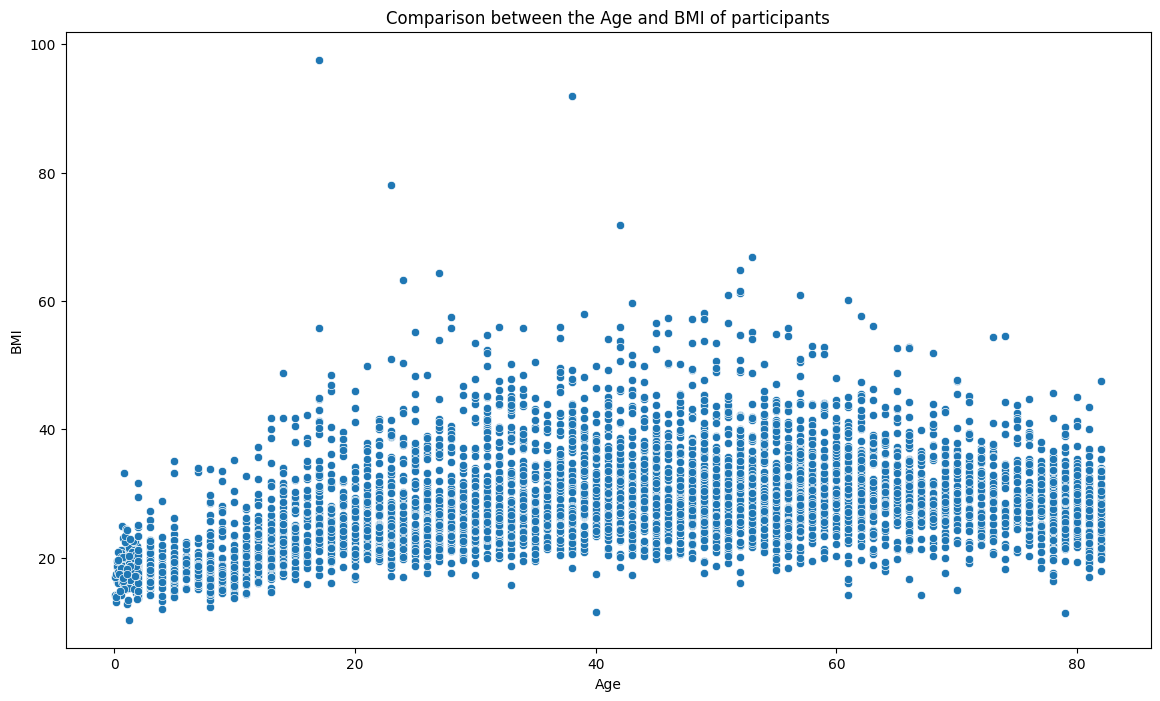

In [43]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data = df , x = 'Age' , y ='BMI')
plt.title("Comparison between the Age and BMI of participants")

Text(0.5, 1.0, 'Housing Location of Participants')

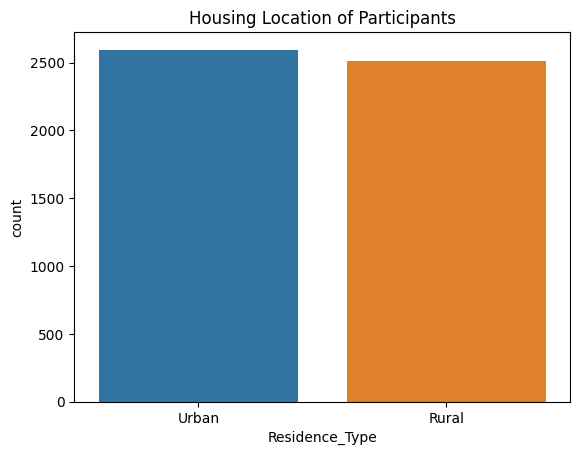

In [44]:
sns.countplot(x="Residence_Type", data=df)
plt.title("Housing Location of Participants")

C:\Users\ownag\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Gender specific Stroke occurences')

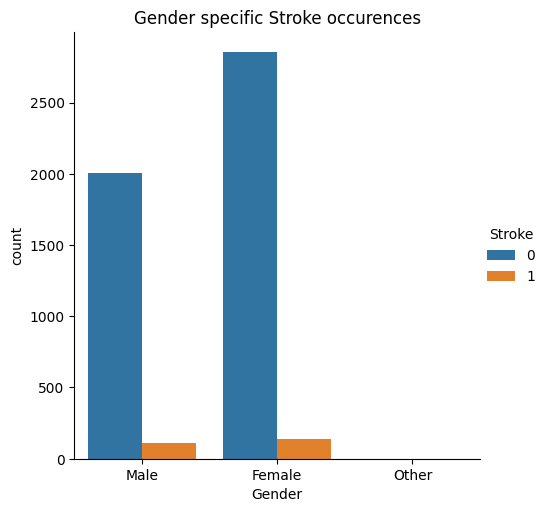

In [45]:
sns.catplot(x="Gender", hue="Stroke", kind="count", data=df)
plt.title("Gender specific Stroke occurences")

C:\Users\ownag\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Gender Specific Heart Condition occurences')

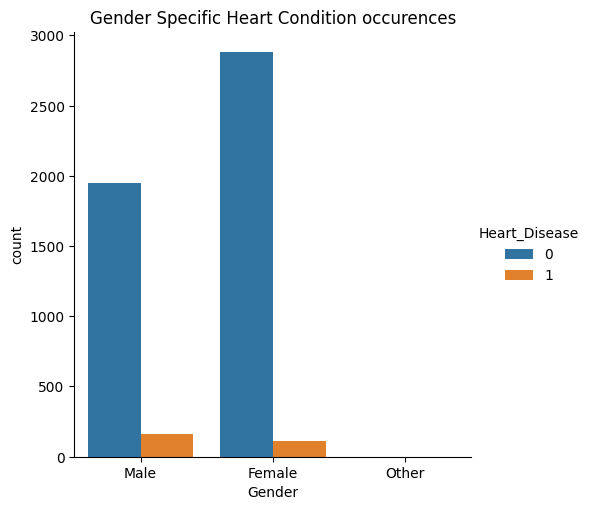

In [46]:
sns.catplot(x="Gender", hue="Heart_Disease", kind="count", data=df)
plt.title("Gender Specific Heart Condition occurences")

C:\Users\ownag\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


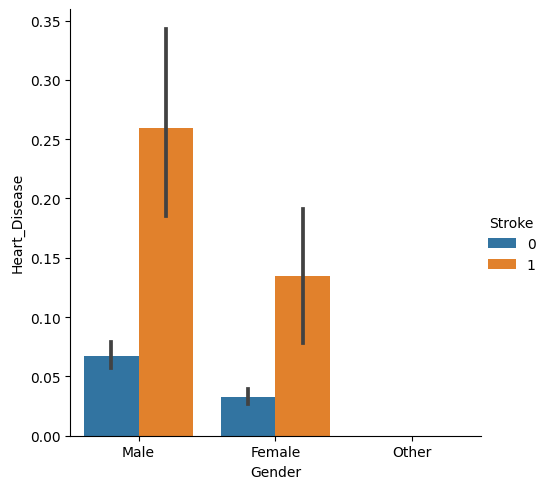

In [47]:
sns.catplot(x="Gender", y="Heart_Disease", hue="Stroke", kind="bar", data=df)

C:\Users\ownag\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Comparison of Hypertension and Strokes')

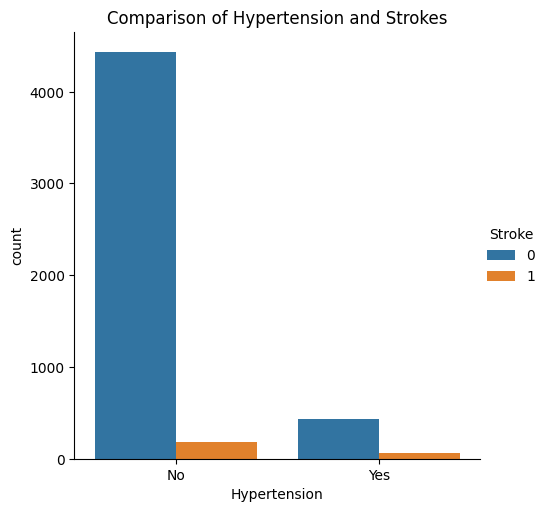

In [48]:
sns.catplot(x="Hypertension", hue="Stroke", kind="count", data=df)
labels = ['No', 'Yes']
xi = list(range(len(labels)))
plt.xticks(xi, labels, rotation = 0)
plt.title("Comparison of Hypertension and Strokes")

C:\Users\ownag\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Gender in Hypertension data')

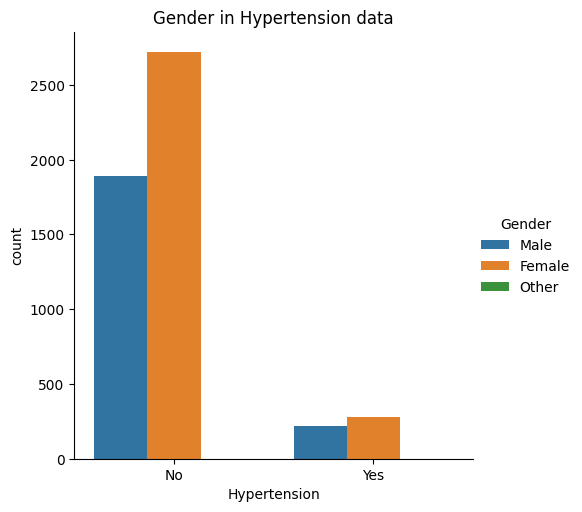

In [49]:
sns.catplot(x="Hypertension", hue="Gender", kind="count", data=df)
labels = ['No', 'Yes']
xi = list(range(len(labels)))
plt.xticks(xi, labels, rotation = 0)
plt.title("Gender in Hypertension data")

C:\Users\ownag\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Hypertension and Gender considering Stroke data')

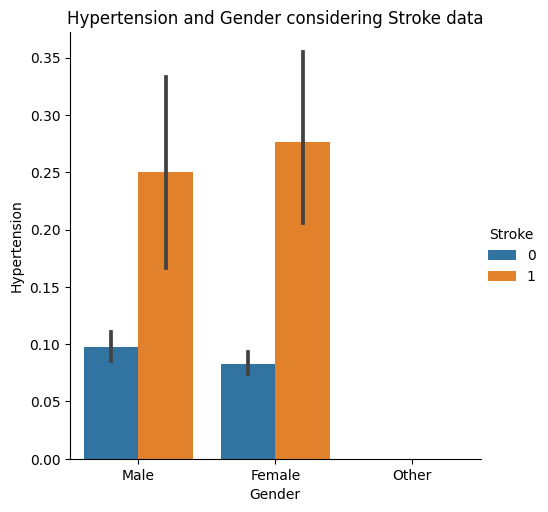

In [50]:
sns.catplot(x="Gender", y="Hypertension", hue="Stroke", kind="bar", data=df)
plt.title("Hypertension and Gender considering Stroke data")

C:\Users\ownag\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Age range of Participants including Stroke data')

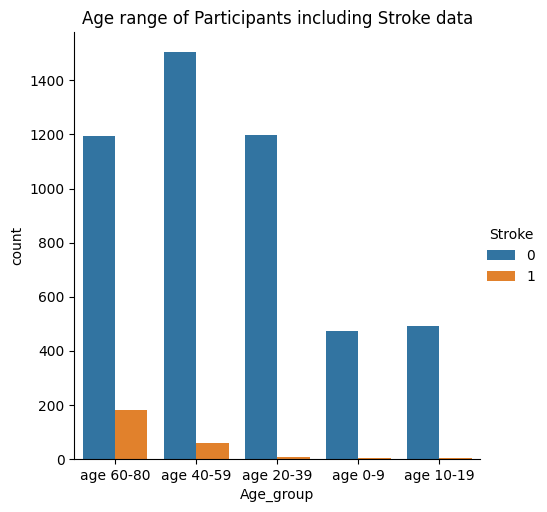

In [51]:
sns.catplot(x="Age_group", hue="Stroke", kind="count", data=df)
plt.title("Age range of Participants including Stroke data")

C:\Users\ownag\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Work Type & Stroke data')

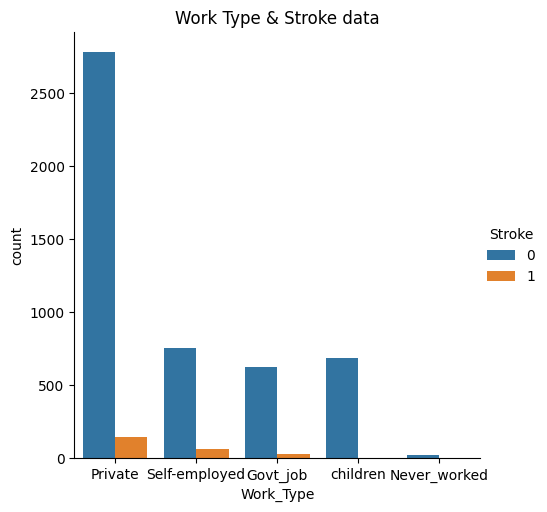

In [52]:
sns.catplot(x="Work_Type", hue="Stroke", kind="count", data=df)
plt.title("Work Type & Stroke data")

C:\Users\ownag\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Smoking status including stroke data')

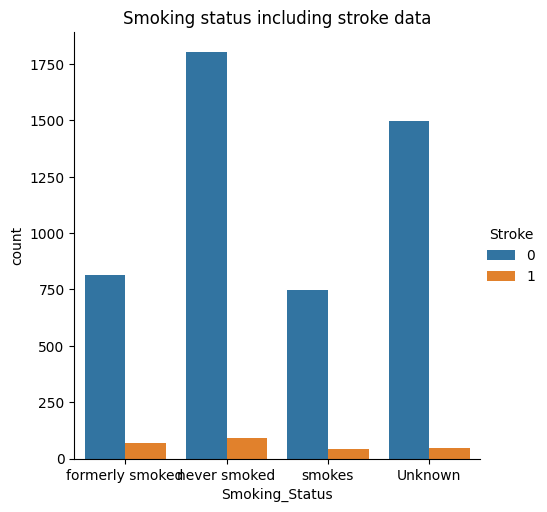

In [53]:
sns.catplot(x="Smoking_Status", hue="Stroke", kind="count", data=df)
plt.title("Smoking status including stroke data")

In [56]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(method='pearson'), annot=True)
plt.title("Heat Map of the Dataset")

ValueError: could not convert string to float: 'Male'

<Figure size 1600x1000 with 0 Axes>

In [74]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_curve
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [105]:
categorical_variables=['Gender','Ever_Married','Work_Type','Residence_Type','Smoking_Status']
label_encoder = preprocessing.LabelEncoder()
for feature in categorical_variables:
    df[feature]= label_encoder.fit_transform(df[feature])
  
df.head()

,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Level,BMI,Smoking_Status,Stroke,Age_group
id,,,,,,,,,,,,
9046,1,67.0,0,1,1,2,1,228.69,36.60,1,1,age 60-80
51676,0,61.0,0,0,1,3,0,202.21,30.21,2,1,age 60-80
31112,1,80.0,0,1,1,2,0,105.92,32.50,2,1,age 60-80
60182,0,49.0,0,0,1,2,1,171.23,34.40,3,1,age 40-59
1665,0,79.0,1,0,1,3,0,174.12,24.00,2,1,age 60-80


In [106]:
df1 = df.drop(['Age_group'], axis = 1)

In [107]:
target_data_name = 'Stroke'
feature_target_all = ['Age', 'Hypertension', 'Heart_Disease', 'Ever_Married', 'Residence_Type', 'Avg_Glucose_Level', 'BMI', 'Gender', 'Work_Type',
                      'Smoking_Status']

In [78]:
target_name = target_data_name
target_data = df1.pop(target_name)
target_data

id
9046     1
51676    1
31112    1
60182    1
1665     1
        ..
18234    0
44873    0
19723    0
37544    0
44679    0
Name: Stroke, Length: 5110, dtype: int64

In [79]:
sm = SMOTE(random_state=2)
df2, target_data1 = sm.fit_resample(df1, target_data.ravel())

In [80]:
train, test, target, target_test = train_test_split(df2, target_data1, test_size=0.2, random_state=0)
print(train.shape, test.shape)

(7777, 10) (1945, 10)


In [81]:
scaler = StandardScaler()
train = pd.DataFrame(scaler.fit_transform(train), columns = train.columns)
test = pd.DataFrame(scaler.transform(test), columns = test.columns)
train

,Gender,Age,Hypertension,Heart_Disease,Ever_Married,Work_Type,Residence_Type,Avg_Glucose_Level,BMI,Smoking_Status
0,-0.687081,1.214310,-0.305029,-0.226654,0.609792,0.042501,1.197546,1.412336,-1.066446,-0.278188
1,-0.687081,1.033663,-0.305029,-0.226654,0.609792,0.042501,-0.835041,-0.722677,-1.504134,-1.314830
2,-0.687081,1.123347,-0.305029,-0.226654,0.609792,1.069000,-0.835041,-0.783103,0.455044,0.758453
3,1.453716,0.304684,-0.305029,-0.226654,0.609792,1.069000,1.197546,-0.607844,1.024421,-0.278188
4,-0.687081,-0.241091,-0.305029,-0.226654,0.609792,1.069000,-0.835041,-0.612174,-0.371610,0.758453
...,...,...,...,...,...,...,...,...,...,...
7772,-0.687081,0.628819,-0.305029,-0.226654,0.609792,0.042501,-0.835041,1.377246,-0.246264,1.795094
7773,-0.687081,-0.136296,-0.305029,-0.226654,0.609792,0.042501,-0.835041,-0.399863,-0.415526,0.758453
7774,1.453716,-0.559460,-0.305029,-0.226654,0.609792,0.042501,-0.835041,-0.948830,0.736110,-1.314830
7775,-0.687081,0.259203,-0.305029,-0.226654,0.609792,0.042501,-0.835041,-0.844369,-0.538526,-0.278188


In [82]:
train_all = train.copy()
target_all = target.copy()
train, valid, target_train, target_valid = train_test_split(train_all, target_all, test_size=0.3, random_state=0)

In [83]:
cv_train = ShuffleSplit(n_splits=3, test_size=0.5, random_state=0)

In [84]:
train.duplicated().sum()

0

In [85]:
valid.duplicated().sum()

0

In [86]:
result = pd.DataFrame({'model' : ['Random Forest','XGB Classifier', 'Logistic Regression'], 'train_score': 0, 'valid_score': 0, 'test_score':0})

In [87]:
lr = LogisticRegression()

parameters = { 'C':[0.1,0.15,0.25],'random_state':[0,1,2]}

lr_CV = GridSearchCV(estimator=lr, param_grid=parameters, cv=cv_train)

lr_CV.fit(train, target_train)
print("Best score: %0.4f" % lr_CV.best_score_)
print("Best parameters set:", lr_CV.best_params_)

y_train_lr = lr_CV.predict(train)

acc_score = round(accuracy_score(target_train, y_train_lr),4)
print(f'Accuracy of Logistic Regression model training is {acc_score}')

result.loc[result['model'] == 'Logistic Regression', 'train_score'] = acc_score

Best score: 0.8039
Best parameters set: {'C': 0.25, 'random_state': 0}
Accuracy of Logistic Regression model training is 0.799


In [88]:
y_val_lr = lr_CV.predict(valid)
acc_score_valid = round(accuracy_score(target_valid, y_val_lr),4)
result.loc[result['model'] == 'Logistic Regression', 'valid_score'] = acc_score_valid
print(f'Accuracy of Logistic Regression model prediction for valid dataset is {acc_score_valid}')

Accuracy of Logistic Regression model prediction for valid dataset is 0.8033


In [89]:
y_test_lr = lr_CV.predict(test)
acc_score_test = round(accuracy_score(target_test, y_test_lr),4)
result.loc[result['model'] == 'Logistic Regression', 'test_score'] = acc_score_test
print(f'Accuracy of Logistic Regression  model prediction for test dataset is {acc_score_test}')

Accuracy of Logistic Regression  model prediction for test dataset is 0.7954


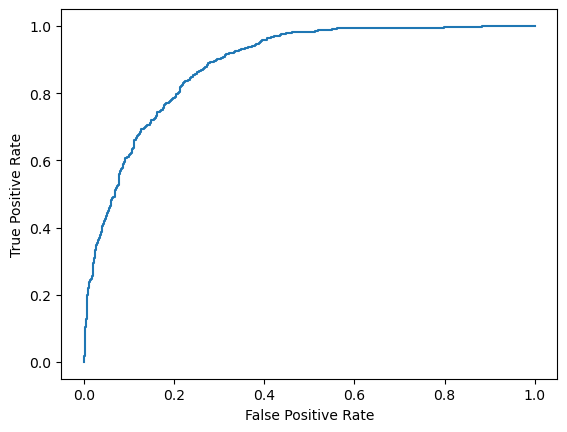

In [90]:
predicted_probab_lr = lr_CV.predict_proba(test)
predicted_probab_lr = predicted_probab_lr[:, 1]
fpr, tpr, _ = roc_curve(target_test, predicted_probab_lr)
#Logistic Regression
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

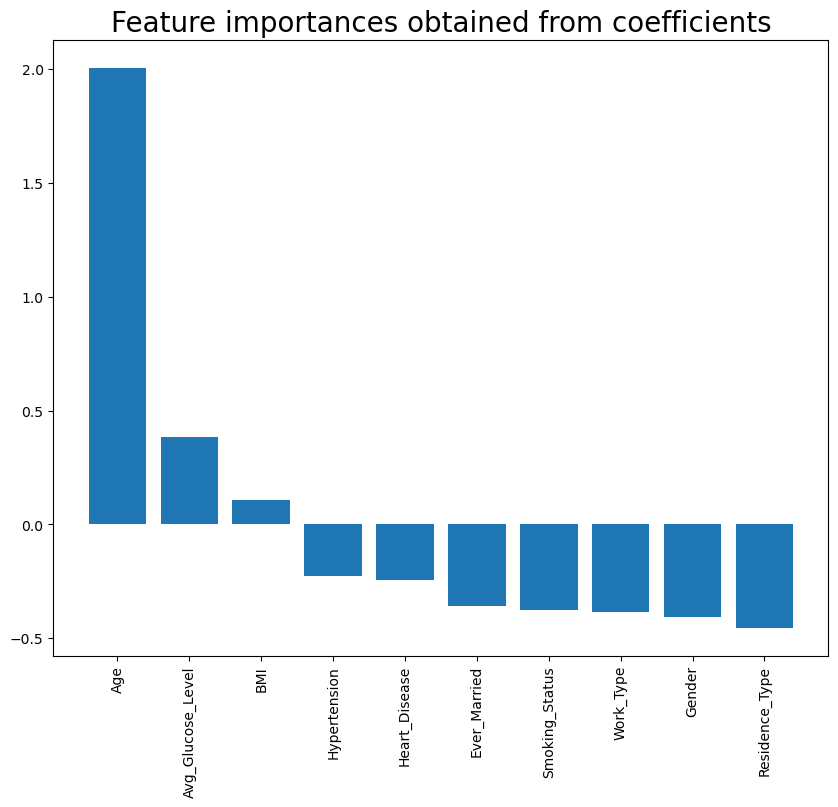

In [91]:
lr = LogisticRegression()
lr.fit(train, target_train)
importances = pd.DataFrame(data={
    'Attribute': train.columns,
    'Importance': lr.coef_[0]})
importances = importances.sort_values(by='Importance', ascending=False)
fig =  plt.figure(figsize = (10,8))
plt.bar(x=importances['Attribute'], height=importances['Importance'])
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [92]:
xgbc = xgb.XGBClassifier() 

parameters = { 'eval_metric':['error'], 'learning_rate':[0.05,0.1]}

xgb_CV = GridSearchCV(estimator=xgbc, param_grid=parameters, cv=cv_train)
xgb_CV.fit(train, target_train)

print("Best score: %0.4f" % xgb_CV.best_score_)
print("Best parameters set:", xgb_CV.best_params_)

y_train_xgb = xgb_CV.predict(train)

acc_score = round(accuracy_score(target_train, y_train_xgb),4)
print(f'Accuracy of XGB Classifier model training is {acc_score}')

result.loc[result['model'] == 'XGB Classifier', 'train_score'] = acc_score

Best score: 0.8981
Best parameters set: {'eval_metric': 'error', 'learning_rate': 0.1}
Accuracy of XGB Classifier model training is 0.9592


In [93]:
y_val_xgb = xgb_CV.predict(valid)
acc_score_valid = round(accuracy_score(target_valid, y_val_xgb),4)
result.loc[result['model'] == 'XGB Classifier', 'valid_score'] = acc_score_valid
print(f'Accuracy of XGB Classifier model prediction for valid dataset is {acc_score_valid}')

Accuracy of XGB Classifier model prediction for valid dataset is 0.9242


In [94]:
y_test_xgb = xgb_CV.predict(test)
acc_score_test = round(accuracy_score(target_test, y_test_xgb),4)
result.loc[result['model'] == 'XGB Classifier', 'test_score'] = acc_score_test
print(f'Accuracy of XGB Classifier model prediction for test dataset is {acc_score_test}')

Accuracy of XGB Classifier model prediction for test dataset is 0.9183


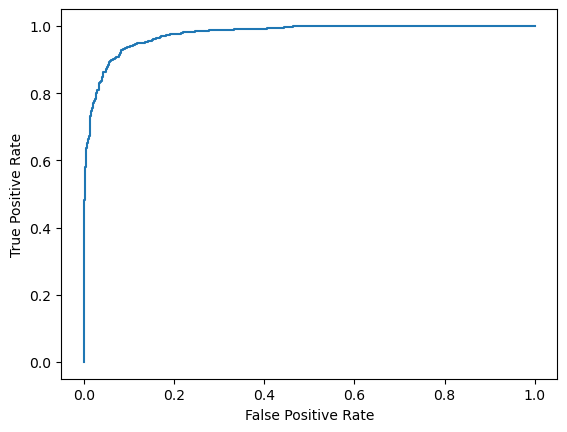

In [95]:
predicted_probab_xgb = xgb_CV.predict_proba(test)
predicted_probab_xgb = predicted_probab_xgb[:, 1]
fpr, tpr, _ = roc_curve(target_test, predicted_probab_xgb)
#XGB Classifier
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

<BarContainer object of 10 artists>

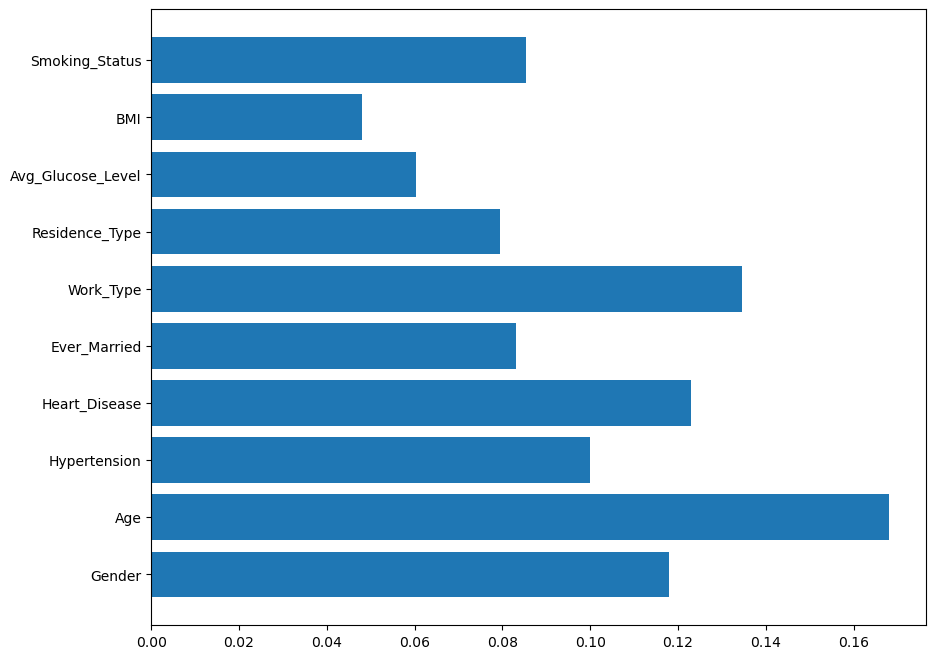

In [96]:
xgbc = xgb.XGBClassifier()
xgbc.fit(train, target_train)
xgbc.feature_importances_
fig =  plt.figure(figsize = (10,8))
plt.barh(train.columns, xgbc.feature_importances_)

In [97]:
rf = RandomForestClassifier()

parameters = {'criterion':['gini'], 'n_estimators':[1], 'random_state':[0,1,2]}              

rf_CV = GridSearchCV(estimator=rf, param_grid=parameters, cv=cv_train)
rf_CV.fit(train, target_train)

print("Best score: %0.4f" % rf_CV.best_score_)
print("Best parameters set:", rf_CV.best_params_)

y_train_rf = rf_CV.predict(train)

acc_score = round(accuracy_score(target_train, y_train_rf),4)
print(f'Accuracy of Random Forest model training is {acc_score}')

result.loc[result['model'] == 'Random Forest', 'train_score'] = acc_score

Best score: 0.8313
Best parameters set: {'criterion': 'gini', 'n_estimators': 1, 'random_state': 1}
Accuracy of Random Forest model training is 0.9497


In [98]:
y_val_rf = rf_CV.predict(valid)
acc_score_valid = round(accuracy_score(target_valid, y_val_rf),4)
result.loc[result['model'] == 'Random Forest', 'valid_score'] = acc_score_valid
print(f'Accuracy of Random Forest model prediction for valid dataset is {acc_score_valid}')

Accuracy of Random Forest model prediction for valid dataset is 0.8608


In [99]:
y_test_rf = rf_CV.predict(test)
acc_score_test = round(accuracy_score(target_test, y_test_rf),4)
result.loc[result['model'] == 'Random Forest', 'test_score'] = acc_score_test
print(f'Accuracy of Random Forest model prediction for test dataset is {acc_score_test}')

Accuracy of Random Forest model prediction for test dataset is 0.8776


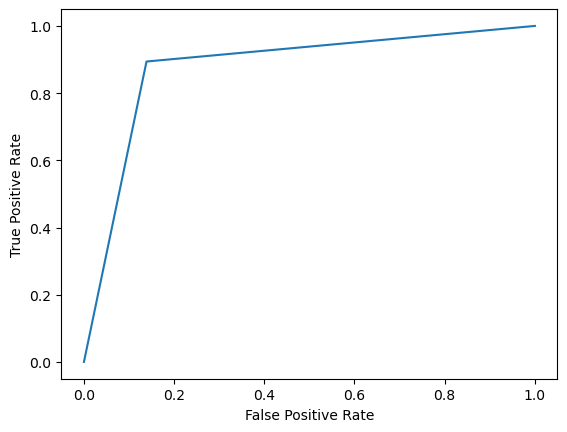

In [100]:
predicted_probab_rf = rf_CV.predict_proba(test)
predicted_probab_rf = predicted_probab_rf[:, 1]
fpr, tpr, _ = roc_curve(target_test, predicted_probab_rf)
#XGB Classifier
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

<BarContainer object of 10 artists>

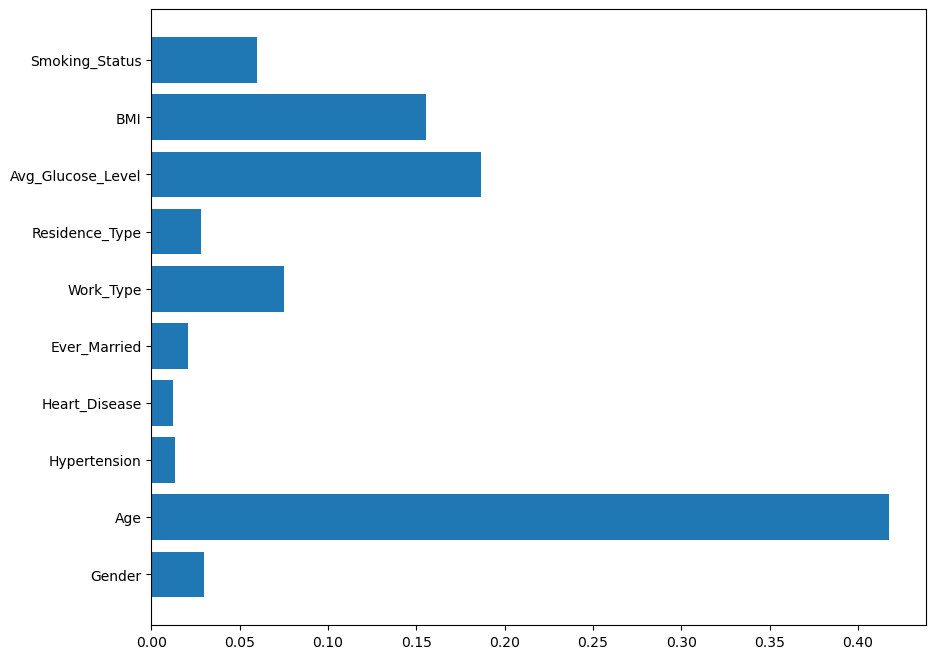

In [101]:
rf = RandomForestClassifier()
rf.fit(train, target_train)
rf.feature_importances_
fig =  plt.figure(figsize = (10,8))
plt.barh(train.columns, rf.feature_importances_)

In [102]:
result

,model,train_score,valid_score,test_score
0,Random Forest,0.9497,0.8608,0.8776
1,XGB Classifier,0.9592,0.9242,0.9183
2,Logistic Regression,0.7990,0.8033,0.7954
